# Training File


In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
import shap
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Reading Dataset
df = pd.read_csv("kdd_test.csv")

label_counts = df["labels"].value_counts()
valid_labels = label_counts[label_counts >= 2].index

df = df[df["labels"].isin(valid_labels)]

print("Remaining classes:", df["labels"].unique())

Remaining classes: ['normal' 'portsweep' 'neptune' 'smurf' 'satan' 'apache2' 'teardrop'
 'guess_passwd' 'ipsweep' 'warezclient' 'nmap' 'warezmaster' 'mscan'
 'back' 'pod' 'httptunnel' 'processtable' 'mailbomb' 'snmpguess' 'saint'
 'multihop' 'snmpgetattack' 'buffer_overflow' 'imap' 'ps' 'rootkit' 'land'
 'xterm' 'sendmail' 'loadmodule' 'xlock' 'ftp_write' 'named']


In [38]:
for label in df["labels"].unique():
    count = df[df["labels"] == label].shape[0]
    print(f"{label}: {count}")

normal: 11245
portsweep: 371
neptune: 6654
smurf: 540
satan: 698
apache2: 228
teardrop: 104
guess_passwd: 411
ipsweep: 479
warezclient: 107
nmap: 206
warezmaster: 279
mscan: 310
back: 227
pod: 35
httptunnel: 41
processtable: 211
mailbomb: 94
snmpguess: 99
saint: 93
multihop: 9
snmpgetattack: 43
buffer_overflow: 17
imap: 2
ps: 9
rootkit: 4
land: 2
xterm: 3
sendmail: 8
loadmodule: 4
xlock: 4
ftp_write: 2
named: 2


In [39]:
# Categorical columns
cat_cols = ["protocol_type", "service", "flag"]

# Encode categorical features
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Encode labels (target)
label_encoder = LabelEncoder()
df["labels"] = label_encoder.fit_transform(df["labels"])

In [40]:
X = df.drop(columns=["labels"])
y = df["labels"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = XGBClassifier(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    eval_metric="mlogloss",
    tree_method="hist",
)

model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [41]:
unique_labels = sorted(y_test.unique())

target_names = [label_encoder.inverse_transform([i])[0] for i in unique_labels]

In [42]:
#   ACCURACY
acc = model.score(X_test, y_test)
print("Test Accuracy:", acc)

y_pred = model.predict(X_test)

Test Accuracy: 0.9886892880904857


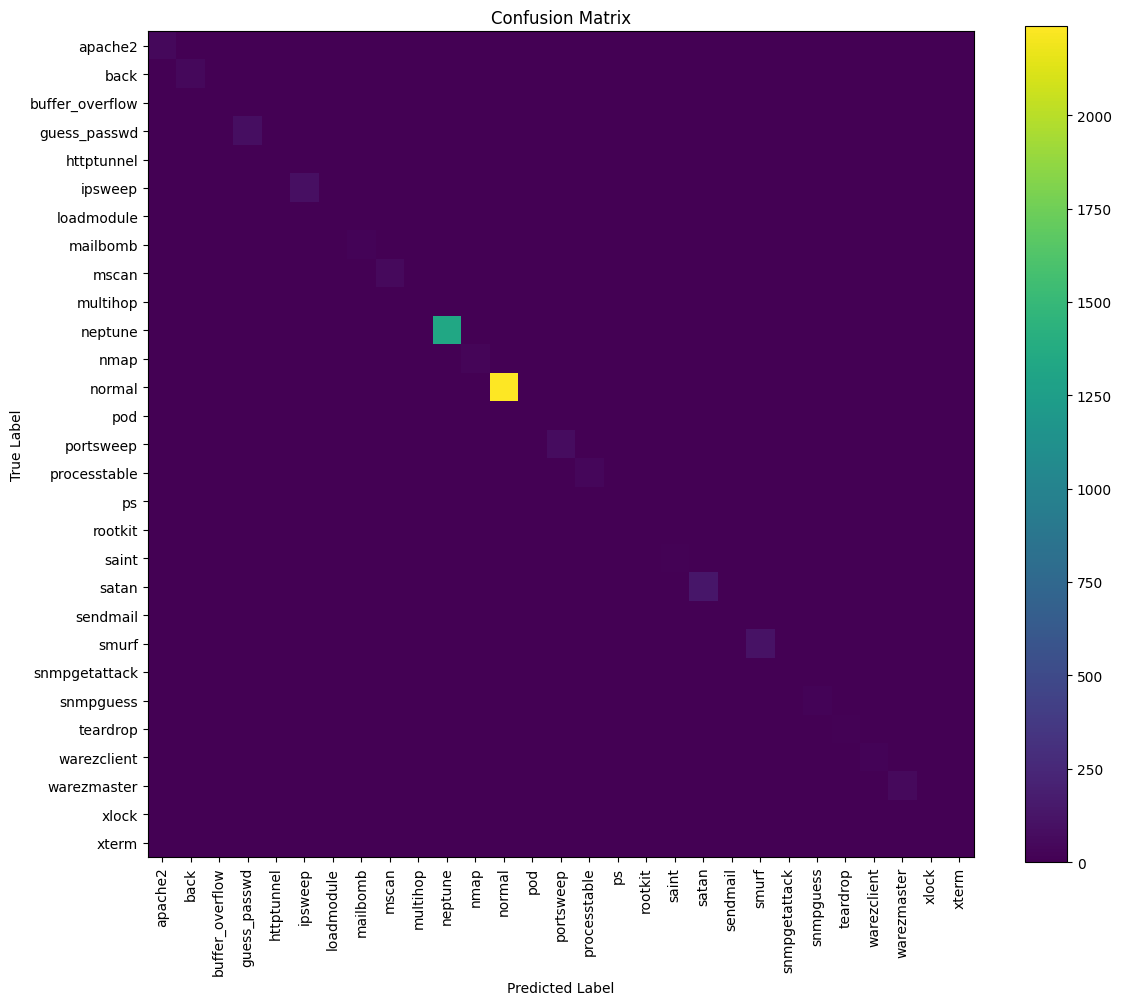

In [43]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, target_names, rotation=90)
plt.yticks(tick_marks, target_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [44]:
# Classification report


report = classification_report(
    y_test, y_pred, labels=unique_labels, target_names=target_names
)

print("\nClassification Report:")
print(report)


Classification Report:
                 precision    recall  f1-score   support

        apache2       1.00      1.00      1.00        46
           back       1.00      1.00      1.00        45
buffer_overflow       0.67      0.67      0.67         3
   guess_passwd       0.99      1.00      0.99        82
     httptunnel       1.00      0.88      0.93         8
        ipsweep       0.95      1.00      0.97        96
     loadmodule       1.00      1.00      1.00         1
       mailbomb       1.00      1.00      1.00        19
          mscan       1.00      0.98      0.99        62
       multihop       0.50      0.50      0.50         2
        neptune       1.00      1.00      1.00      1331
           nmap       1.00      0.80      0.89        41
         normal       0.99      1.00      0.99      2249
            pod       1.00      0.86      0.92         7
      portsweep       0.96      0.99      0.97        74
   processtable       1.00      1.00      1.00        42
      

c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

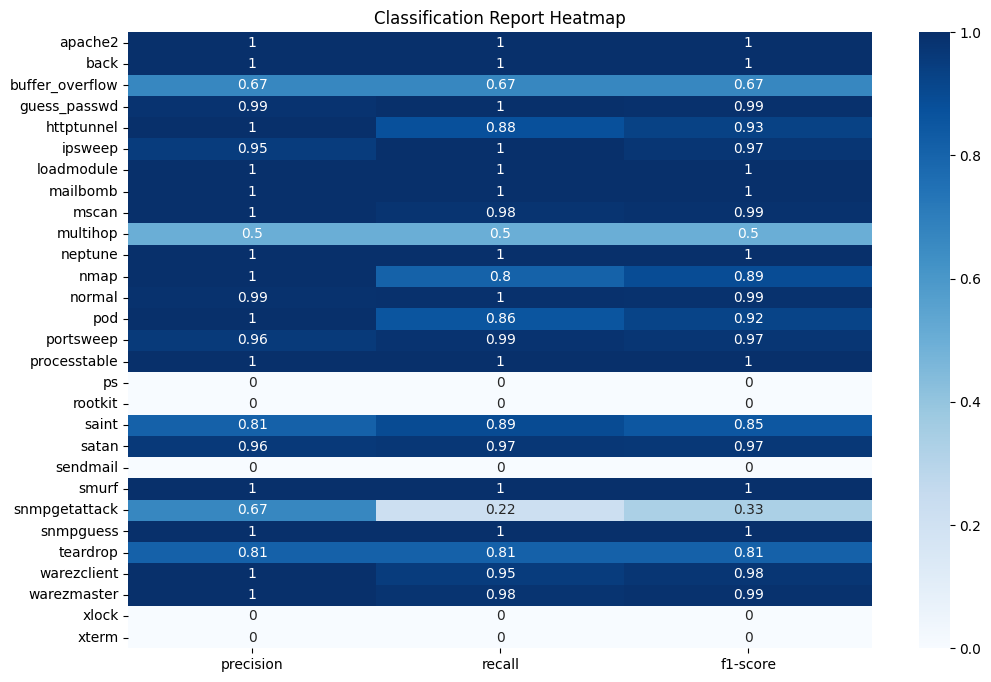

In [47]:
report_dict = classification_report(
    y_test, y_pred, labels=unique_labels, target_names=target_names, output_dict=True
)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(12, 8))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap="Blues")  # ignore avg rows
plt.title("Classification Report Heatmap")
plt.show()

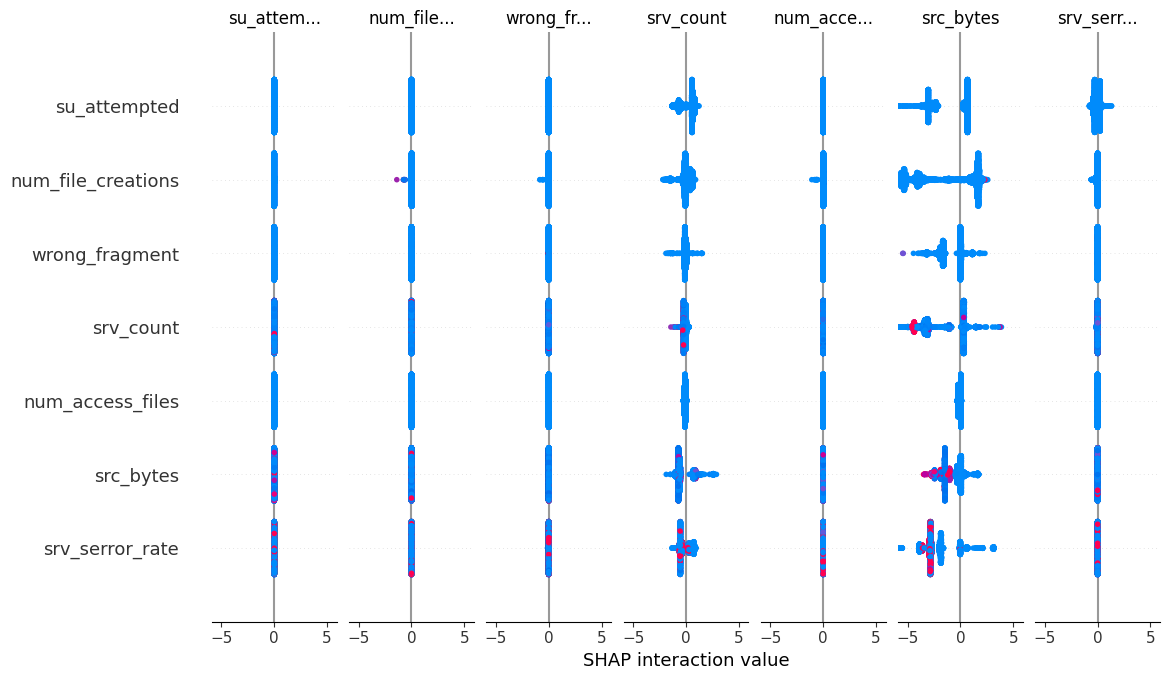

Model with explainer saved to model_with_explainer.pkl


In [45]:
# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

#     Save model + explainer
with open("model_with_explainer.pkl", "wb") as f:
    pickle.dump(
        {
            "model": model,
            "explainer": explainer,
            "label_encoder": label_encoder,
            "feature_encoders": encoders,
            "feature_names": X.columns.tolist(),
            "class_names": label_encoder.classes_.tolist(),
        },
        f,
    )

print("Model with explainer saved to model_with_explainer.pkl")